In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import gamma as gms
import math

In [72]:
def Suspectible(beta,I,S,N):
    return (-beta/N)*I*S
def Infectious(beta,gamma,I,S,N):
    return -Suspectible(beta,I,S,N)-(gamma)*I
def Recovered(gamma,I):
    return gamma*I

In [73]:
def euler(y,beta,gamma,N,t,t0):
    h=(t-t0)/t # dentaT
    S0,I0=y
    i=1
    while(i<=t):
        S=S0+h*Suspectible(beta,I0,S0,N)
        I=I0+h*Infectious(beta,gamma,I0,S0,N)
        S0,I0=S,I
        i+=1
    return S,I,N-S-I

In [74]:
N=1000
beta=1.45
gamma=0.6
S=995
I=5
R=0
y=S,I
a=list()
b=list()
c=list()
a.append(S)
b.append(I)
c.append(R)
for i in range(1,21):
    s00,i00,r00=euler(y,beta,gamma,N,i,0)
    a.append(s00)
    b.append(i00)
    c.append(r00)
week=[i for i in range(0,21)]
week=np.array(week).reshape(21,1)
a=np.array(a).reshape(21,1)
b=np.array(b).reshape(21,1)
c=np.array(c).reshape(21,1)

sns.set(style="whitegrid")
data=np.concatenate((week,a.round(5),b.round(5),c.round(5)),axis=1)

pd.DataFrame(data,range(0,21), columns=["Week","Susceptible", "Infectious", "Recovered"])


,Week,Susceptible,Infectious,Recovered
0,0.0,995.00000,5.00000,0.00000
1,1.0,987.78625,9.21375,3.00000
2,2.0,974.58949,16.88226,8.52825
3,3.0,950.73224,30.61015,18.65761
4,4.0,908.53425,54.44205,37.02370
5,5.0,836.81367,93.49740,69.68893
6,6.0,723.36582,150.84681,125.78737
7,7.0,565.14554,218.55900,216.29546
8,8.0,386.04496,266.52418,347.43086
9,9.0,236.85400,255.80063,507.34537


In [75]:
def proposal_distribution(x_cur): #sampler_from_q
    cov = np.array([[1.0, 0.],
                    [0., 1.0]])
    x_proposed = np.random.multivariate_normal(x_cur, cov)
    return x_proposed
def prior_function(x): #p_pdf
    mean = np.array([3.0,3.0])
    cov = np.array([[0.5, 0],
                    [0, 0.5]])
    return stats.multivariate_normal.pdf(x, mean, cov)
def p_pdf(x_star, x_cur): #q_pdf
    cov = np.array([[1.0, 0.],
                    [0., 1.0]])
    return stats.multivariate_normal.pdf(x_star, x_cur, cov)


In [76]:
def Metropolis_Hashing(x, N):
    sample = np.zeros(shape=(N, 2))
    sample[0] = x
    for i in range(N-1):
        x_cur = sample[i]
        x_star = proposal_distribution(x_cur)
        rate_alpha = (prior_function(x_star)*p_pdf(x_cur, x_star))/(prior_function(x_cur)*p_pdf(x_star, x_cur))
        if(min(1, rate_alpha) >= np.random.uniform(0.0, 1.0)):
            # r>=random(0,1)
            sample[i+1] = x_star
        else:
            sample[i+1] = x_cur
    return sample



In [77]:
init=np.array([1.2,0.6])
c= Metropolis_Hashing(init,1000)

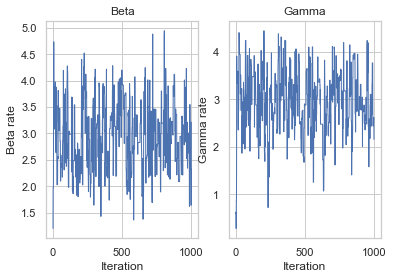

In [78]:
plt.subplot(1,2,1)
plt.plot(c[:,0],linewidth=1)
plt.xlabel("Iteration")
plt.ylabel("Beta rate")
plt.title("Beta")
plt.subplot(1,2,2)
plt.plot(c[:,1],linewidth=1)
plt.xlabel("Iteration")
plt.ylabel("Gamma rate")
plt.title("Gamma")
plt.show()


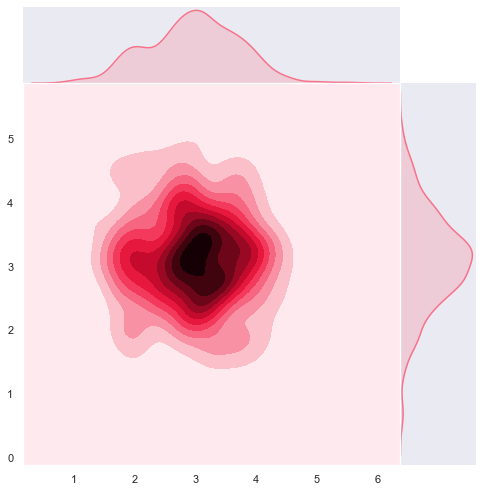

In [62]:
sns.set(style="dark")
sns.set_palette("husl")
zx=sns.jointplot(c[:,0], c[:,1], kind="kde",height=7, space=0) # kind="hex" or kde
zx.savefig("redhole.jpg",dpi=500)

In [79]:
pd.DataFrame(c).to_csv("data.csv", index = False)
c

array([[1.2       , 0.6       ],
       [1.97068926, 0.62280934],
       [1.97068926, 0.62280934],
       ...,
       [1.63768991, 2.61880334],
       [1.63768991, 2.61880334],
       [3.21576713, 2.15565651]])

In [55]:
paths = 'C:/Users/Asus/Desktop/nộp/py/datashet.xlsx'
DF = pd.read_excel(paths).T
DF


,0,1,2,3,4,5,6,7,8
Country,Laos,Laos,Laos,Cambodia,Cambodia,Cambodia,Vietnam,Vietnam,Vietnam
Status,Confirmed,recorvered,dead,Confirmed,recorvered,dead,Confirmed,Recorvered,Dead
1/22/20,0,0,0,0,0,0,2,0,0
1/23/20,0,0,0,0,0,0,2,0,0
1/24/20,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
2020-05-07 00:00:00,19,19,0,141,131,0,369,340,0
2020-06-07 00:00:00,19,19,0,141,131,0,369,341,0
2020-07-07 00:00:00,19,19,0,141,131,0,369,342,0
2020-08-07 00:00:00,19,19,0,141,131,0,369,347,0


In [14]:
#lấy dữ liệu I và R từ bảng 
data = np.zeros(shape=(507, 2),dtype = 'int')
a = np.array(DF)
for i in range(0,169):
    data[i,0] = a[i+2,0]
    data[i,1] = a[i+2,1]

for i in range(0,169):
    data[i+169,0] = a[i+2,3]
    data[i+169,1] = a[i+2,4]

vietnamese = np.zeros(shape=(170, 2),dtype = 'int')

for i in range(0,169):
    vietnamese[i,0] = a[i+2,6]
    vietnamese[i,1] = a[i+2,7]
    data[i+338,0] = a[i+2,6]
    data[i+338,1] = a[i+2,7]



In [15]:
def x_pdf(x,mean,cov):  
    return stats.multivariate_normal.pdf(x, mean, cov)

def _function(a,b,y):
    return (pow(y,b)*pow(a,b-1)*math.exp(-y*a))/gms(b)

def likelihood_function(data,B,Y,m):
    data_arr = data
    mean = np.mean(data_arr[:,[0,1]],axis =0)
    cov = np.cov(data_arr[:,[0,1]].T)
    b = 1.2
    y = 0.6
    re = 1
    for i in range(m):
        a = x_pdf(data_arr[:,[0,1]][i,:],mean,cov)
        re = re * _function(a,b,y)
    return re

def e_function(data,x,n,m):
    re=0
    for i in range(n):
        
        a=x[i,0]/x[i,1]
        re = re +likelihood_function(data,x[i,0],x[i,1],m)*a
    return re

In [16]:
data

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [369, 341],
       [369, 342],
       [369, 347]])

In [17]:
e_function(data,c,1000,507)

0.0

In [33]:
e_function(vietnamese,c,1000,169)

1.0088595177089162e-205